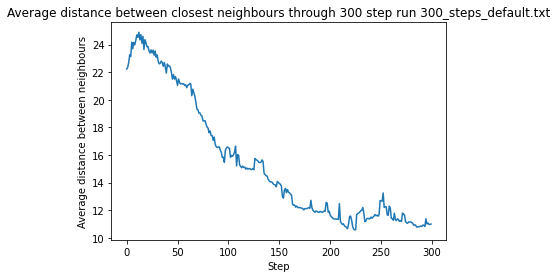

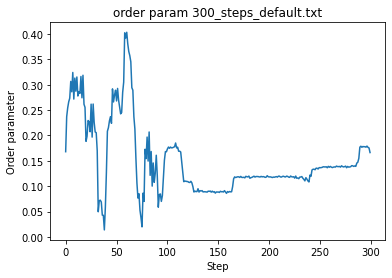

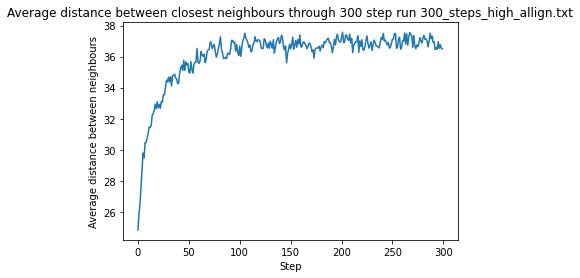

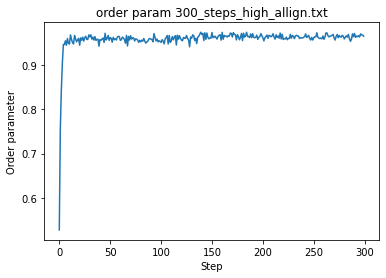

: 

In [1]:
import matplotlib.pyplot as plt

filenames = ["300_steps_default.txt", "300_steps_high_allign.txt"]

for filename in filenames:
    positions_per_step = []
    order_params = []
    nearest_neighbour_distsances = []
    avg_dist = []
    with open(filename, "r") as f:
        for line in f:
            if(line.startswith("positions")):
                positions = [pos for pos in line[line.find(':')+1:].strip().split(";") if pos.startswith("(") and pos.endswith(")")]
                assert(len(positions) == 200)
                positions = [(float(pos[1:-1].split(",")[0]), float(pos[1:-1].split(",")[1])) for pos in positions]
                positions_per_step.append(positions)
            elif(line.startswith("order_param")):
                order = float(line[line.index("(")+1:line.index(")")].strip())
                order_params.append(order)
            elif(line.startswith("Nearest Neighbor Distances")):
                nns = [float(nn) for nn in line[line.index("[")+1:line.index("]")].strip().split(",") if len(nn) > 0]
                assert(len(nns) == 200)
                nearest_neighbour_distsances.append(nns)
            elif(line.startswith("avg_dist")):
                avg = float(line[line.index(":")+1:line.index("boids")].strip())
                avg_dist.append(avg)
            else:
                raise Exception(f"Unrecognised token at the start of the line: {line}")
    plt.plot(avg_dist)
    plt.ylabel("Average distance between neighbours")
    plt.xlabel("Step")
    plt.title(f"Average distance between closest neighbours through 300 step run {filename}")
    plt.show()

    plt.plot(order_params)
    plt.ylabel("Order parameter")
    plt.xlabel("Step")
    plt.title(f"order param {filename}")
    plt.show()